<a href="https://colab.research.google.com/github/uchaiaye53/ML-AI-Lab/blob/main/assignment-1/normal_equation_2017831053.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
import io

# **Data** **Managing**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving House_Rent_Dataset.csv to House_Rent_Dataset.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['House_Rent_Dataset.csv']))
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
y = data['Rent'].values
x1 = data['Size'].values
x2 = data['BHK'].values
x3 = data['Bathroom'].values
x4 = data['Furnishing Status'].values

In [ ]:
max_x1 = max(x1)
min_x1 = min(x1)
mean_x1 = round(np.mean(x1))
print(max_x1,min_x1,mean_x1,x1)

8000 10 967 [1100  800 1000 ... 1750 1500 1000]


In [ ]:
def replace_values(list_to_replace, item_to_replace, item_to_replace_with):
    return [item_to_replace_with if item == item_to_replace else item for item in list_to_replace]
x4 = replace_values(x4,'Furnished',3)
x4 = replace_values(x4,'Semi-Furnished',2)
x4 = replace_values(x4,'Unfurnished',1)

In [ ]:
#y = np.array(y)
Y = [y]
print(Y)
Y = np.transpose(Y)
print(Y)

[array([10000, 20000, 17000, ..., 35000, 45000, 15000])]
[[10000]
 [20000]
 [17000]
 ...
 [35000]
 [45000]
 [15000]]


In [ ]:
print(len(x1),len(x2),len(x3),len(x4),len(Y))

4746 4746 4746 4746 4746


In [ ]:
X = []
column = 5
row = len(Y)
for r in range(row):
  temp_list = []
  temp_list.append(1)
  temp_list.append(x1[r])
  temp_list.append(x2[r])
  temp_list.append(x3[r])
  temp_list.append(x4[r])
  X.append(temp_list)

print((X))

[[1, 1100, 2, 2, 1], [1, 800, 2, 1, 2], [1, 1000, 2, 1, 2], [1, 800, 2, 1, 1], [1, 850, 2, 1, 1], [1, 600, 2, 2, 1], [1, 700, 2, 2, 1], [1, 250, 1, 1, 1], [1, 800, 2, 2, 1], [1, 1000, 2, 2, 2], [1, 1200, 3, 2, 2], [1, 400, 1, 1, 1], [1, 250, 1, 1, 3], [1, 375, 1, 1, 1], [1, 900, 3, 2, 1], [1, 1286, 3, 2, 3], [1, 600, 2, 1, 2], [1, 800, 2, 1, 1], [1, 2000, 2, 1, 1], [1, 660, 2, 1, 1], [1, 650, 2, 1, 1], [1, 400, 2, 2, 1], [1, 300, 1, 1, 1], [1, 1600, 3, 1, 1], [1, 400, 1, 1, 2], [1, 1000, 2, 1, 1], [1, 355, 1, 1, 2], [1, 1000, 2, 1, 2], [1, 800, 2, 1, 1], [1, 850, 2, 2, 1], [1, 350, 1, 1, 1], [1, 900, 2, 2, 1], [1, 550, 2, 1, 2], [1, 500, 2, 2, 1], [1, 1100, 3, 1, 1], [1, 850, 2, 1, 2], [1, 800, 2, 1, 1], [1, 630, 2, 1, 1], [1, 900, 2, 2, 2], [1, 270, 1, 1, 2], [1, 630, 2, 1, 2], [1, 1500, 3, 2, 3], [1, 600, 1, 1, 1], [1, 700, 2, 1, 2], [1, 300, 1, 1, 2], [1, 1300, 2, 2, 2], [1, 400, 2, 1, 2], [1, 650, 2, 2, 1], [1, 2000, 3, 2, 2], [1, 1068, 3, 2, 2], [1, 150, 1, 1, 3], [1, 450, 1, 1, 1

# **Normal Equation Calculation Starts From Here**

In [ ]:
XT = np.transpose(X)
#print((XT))

In [ ]:
XTX = np.matmul(XT,X)
#print((XTX))

In [ ]:
from numpy.linalg import inv
INV_XTX = inv(XTX)
#print((INV_XTX))

In [ ]:
XTY = np.matmul(XT,Y)
#print(XTY)

In [ ]:
thetas = np.matmul(INV_XTX,XTY)
print(len(thetas),len(thetas[0]))
print(thetas)

5 1
[[-4.93089571e+04]
 [ 2.35095594e+01]
 [-1.29289804e+03]
 [ 2.64676202e+04]
 [ 6.93957077e+03]]


In [ ]:
t0 = thetas[0][0]
t1 = thetas[1][0]
t2 = thetas[2][0]
t3 = thetas[3][0]
t4 = thetas[4][0]
print(t0,t1,t2,t3,t4)

-49308.9570519877 23.509559413395415 -1292.8980373916556 26467.620179929152 6939.570768955076


# **Cost** **Calculate**

In [ ]:
m = len(x1)
sum = 0
for j in range(m):
    tsum = t0 +  t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]
    tsum = tsum * tsum
    sum = sum + tsum
    
cost = sum/(2*m)
print(cost)

2394004443.1277804


In [ ]:
predict = t0 + t1*1100 + t2*2 + t3*2 + t4*1
print(predict)

33840.57335677733


# **Plotting**

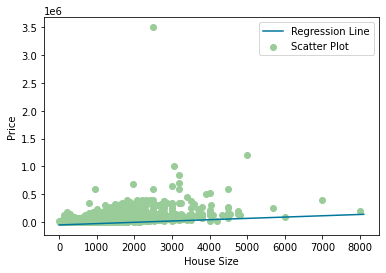

In [ ]:
max_x = np.max(x1) + 100
min_x = np.min(x1)
x = np.linspace(min_x, max_x, 1000)
yy = t1 * x + t0
plt.plot(x, yy, color='#01779c', label='Regression Line')
plt.scatter(x1, y, c = "#99cc99", label = 'Scatter Plot')

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()